# Finding The Best Machine Learning Classification Model for Predicting Customer Churn Rate of Telecom Companies!

# 1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

## Telecom Service Providers use customer attrition analysis as one of their key business metrics... since the cost of retaining an existing customer is far less than acquiring a new one...


### Machine Learning Algorithms help companies analyze customer attrition rate based on several factors (various services subscribed by customers, tenure rate, gender, senior citizen, payment method, etc.)


# In this project:
### We will train several classification algorithms:
1. Logistic Regression
2. SVM - Support Vector Machine
3. K-Nearest Neighbors
4. Random Forest Classifier
5. Naiive Bayes Model

Top 5 telecom companies in North America in 2020:
1. ATT
2. Verizon
3. Comcast
4. Time Warner Cable
5. Bell

# 2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install cufflinks
# Cufflinks is a third-party wrapper library around Plotly

In [3]:
import numpy as np # Multi-dimensional array object
import pandas as pd # DataFrames / Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'chesterish', context= 'notebook', ticks= True, grid= False)

In [4]:
# Read the CSV file 
telecom_df = pd.read_csv('telecom_churn.csv')

In [5]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Load the bottom 5 instances 
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [7]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [8]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [10]:
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# 3: EDA using DATA VISUALIZATION

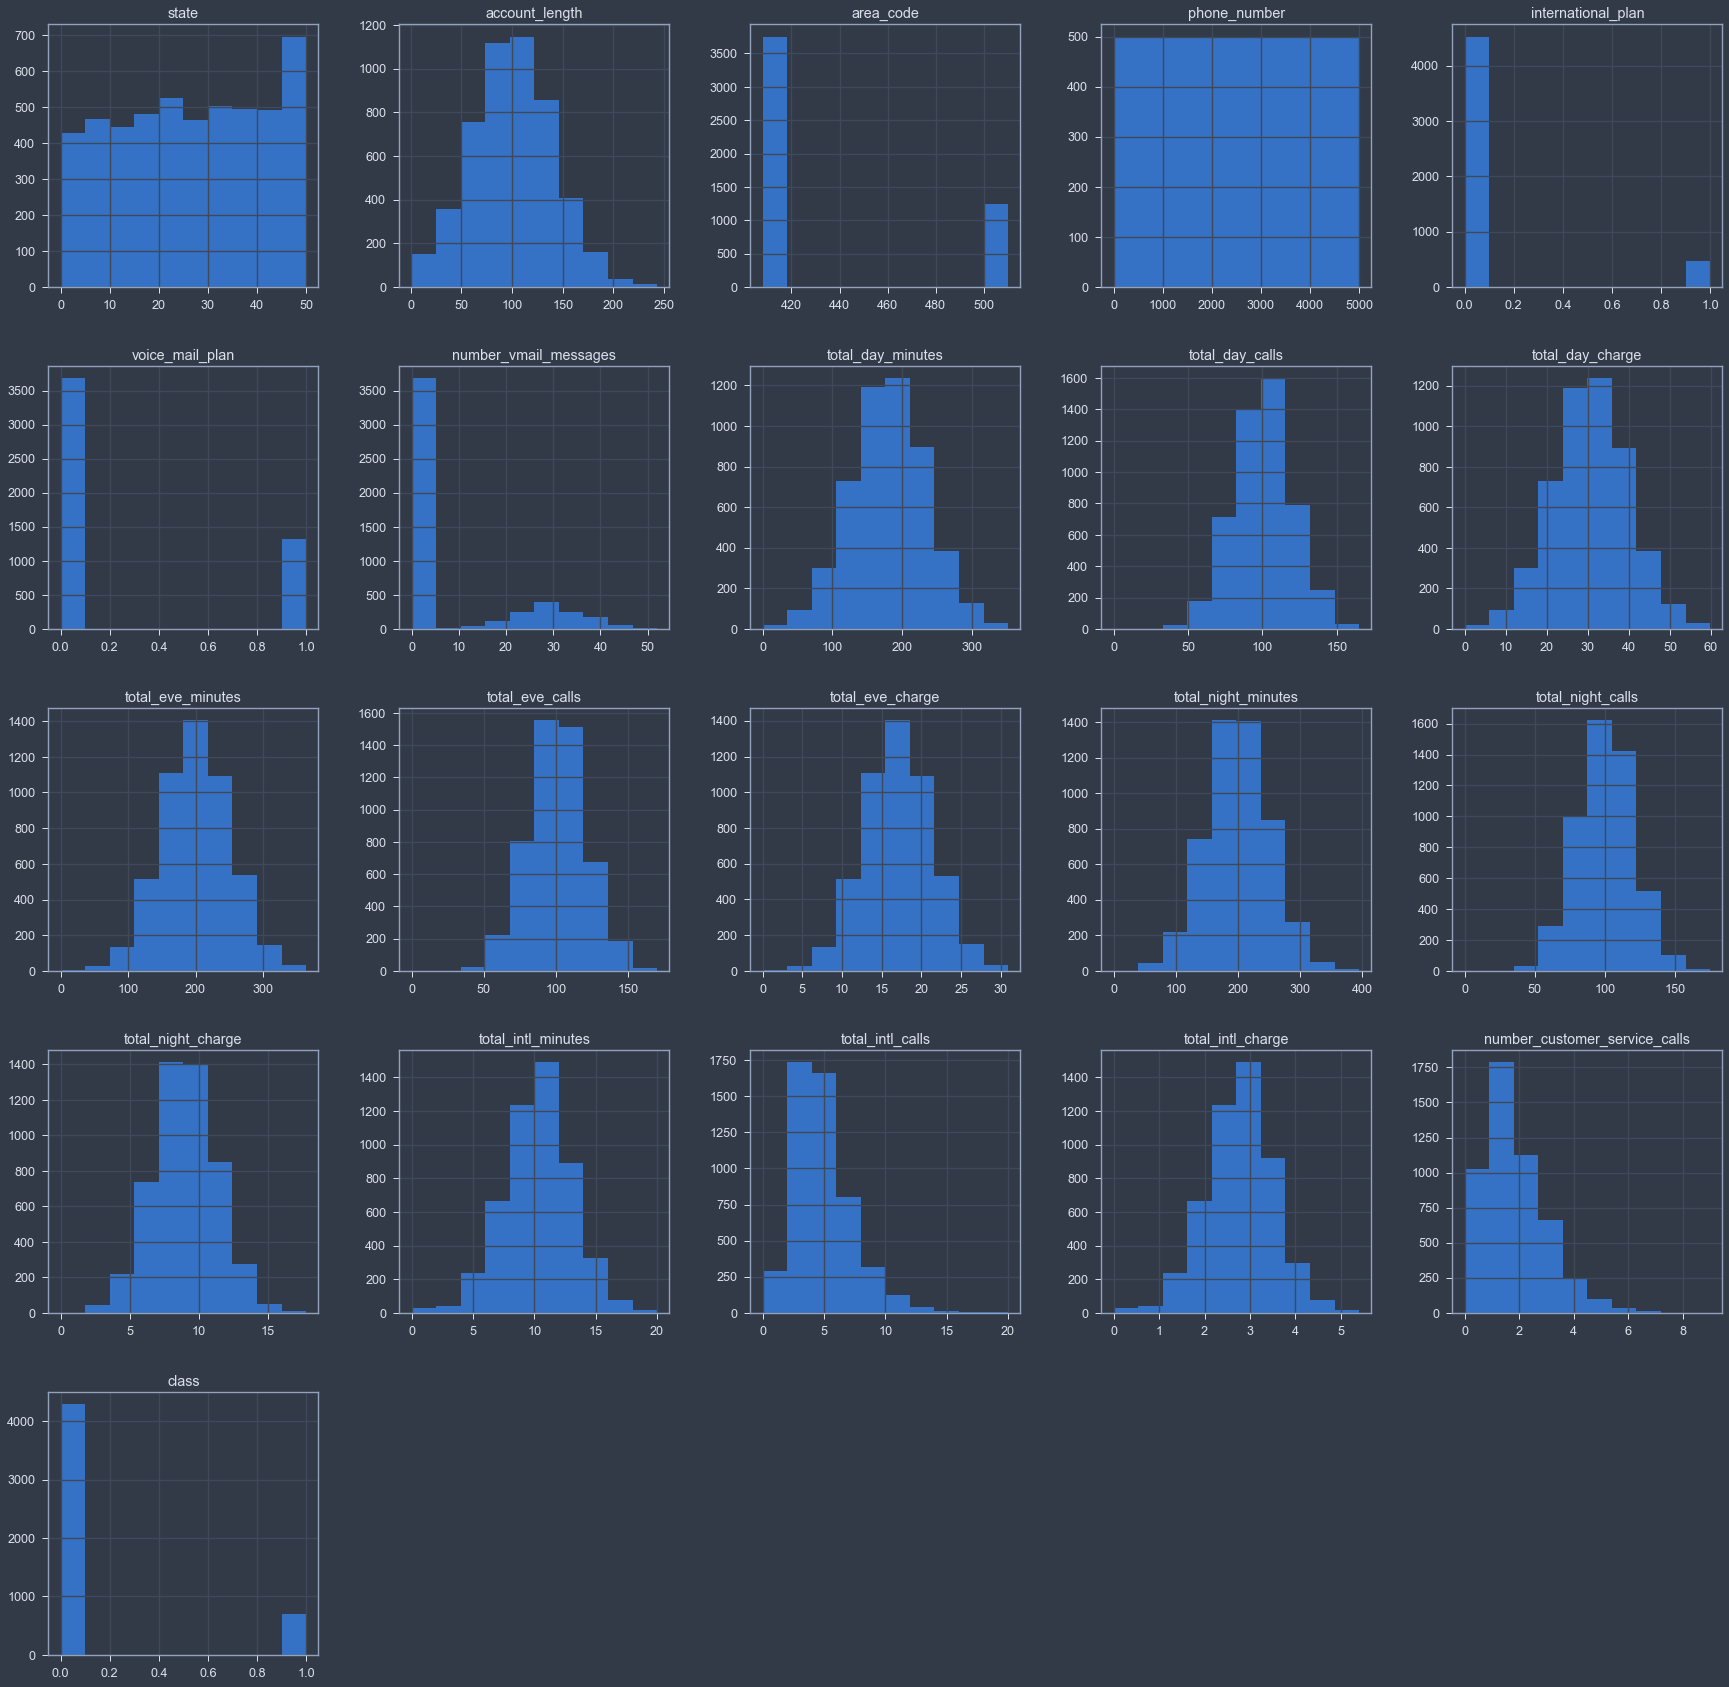

In [12]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [13]:
telecom_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


### Notice "class" column at the end of dataframe: This reads whether the customer is retained (0) or decided to leave or discontinue service (1)... This is what we want our machine learning models to predict!

In [14]:
#how many customers being retained vs left?
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

#### 4293 customers have stayed with service...
#### 707 customers have discontinued service...

In [15]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Retained (0)', 'Exited (1)'], values = telecom_df['class'].value_counts())])
fig.show()

In [16]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(telecom_df, x = 'international_plan', color = 'class')
fig.show()

#### By adding ",color = 'class' " in the fig code for plotting the histogram above, we can display those who have discontinued service among those who have an international plan and those who discontinued service among those who did not have an international plan 

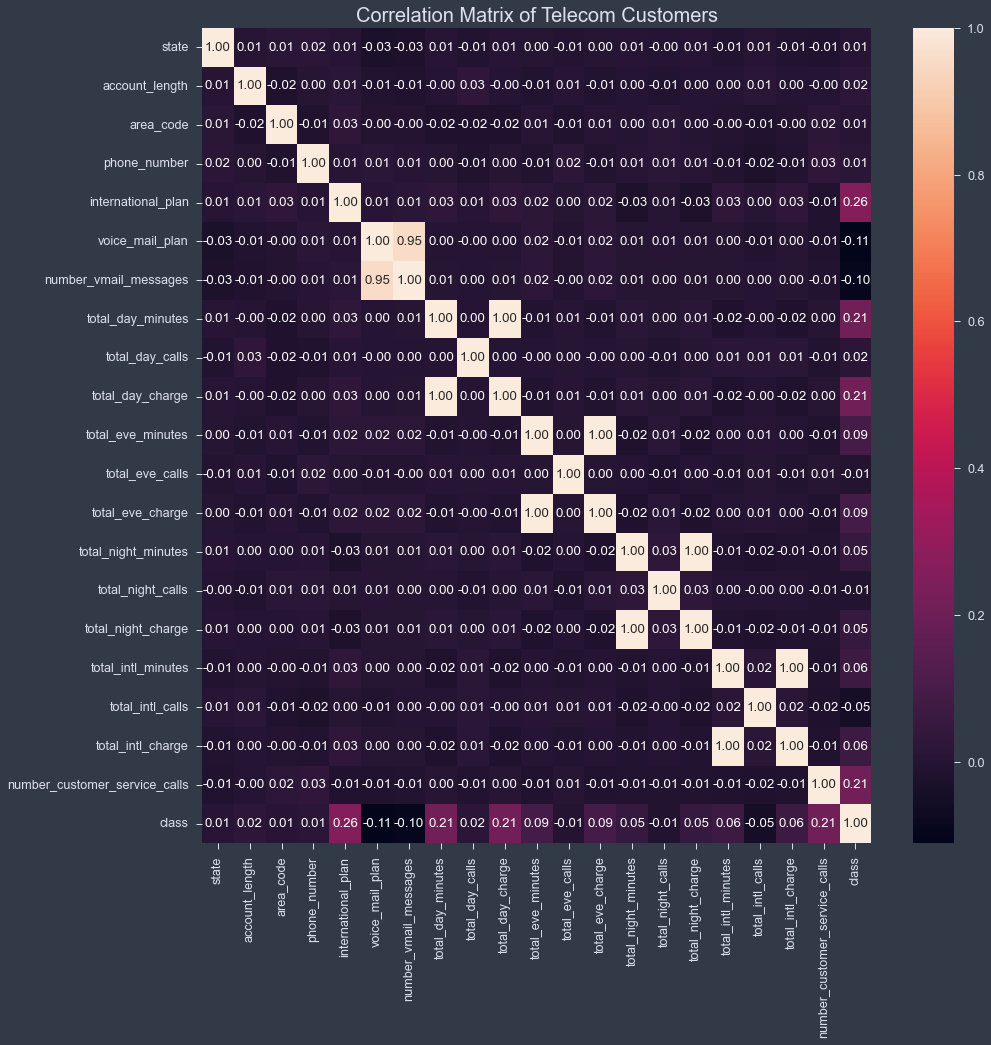

In [17]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

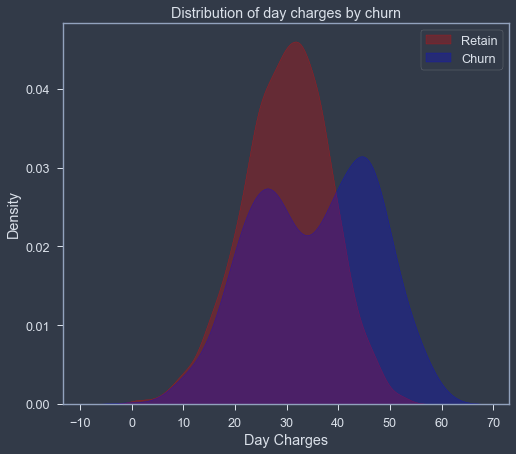

In [18]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

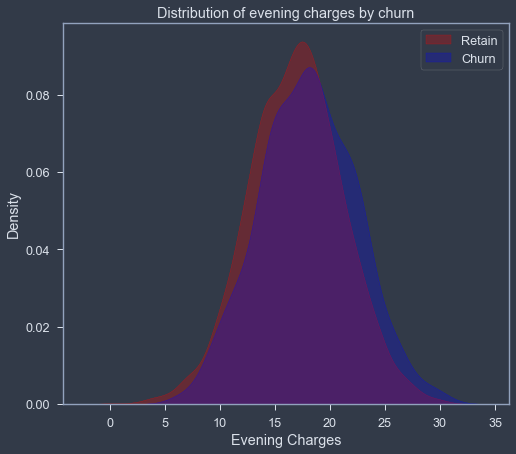

In [19]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [20]:
fig = px.histogram(telecom_df, x = 'voice_mail_plan', color = 'class')
fig.show()

# 4: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [21]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

#inputs: 
X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
#outputs:
y = telecom_df["class"]

In [22]:
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,49,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,7,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,7,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [24]:
X.shape

(5000, 18)

In [25]:
y.shape

(5000,)

In [26]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [27]:
X_train.shape, X_test.shape

((3500, 18), (1500, 18))

In [28]:
y_train.shape, y_test.shape

((3500,), (1500,))

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

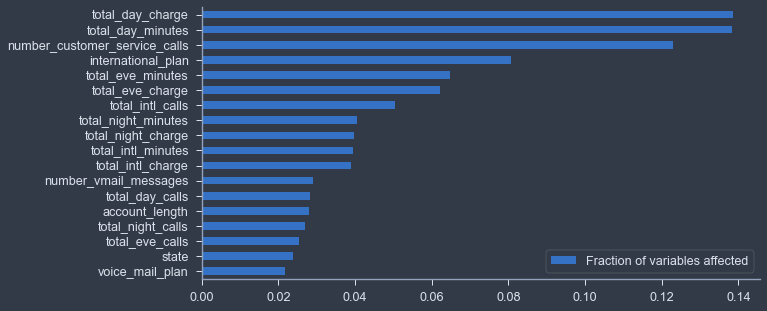

In [30]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected") #sort feature importance!
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

### From this, we can see that Total Daily Minutes and Total Daily Charge are the most important features/factors of customers discontinuing!

In [31]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# 5: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

## Slides below to help refresh/explain the statistics/algorithm of Logistic Regression

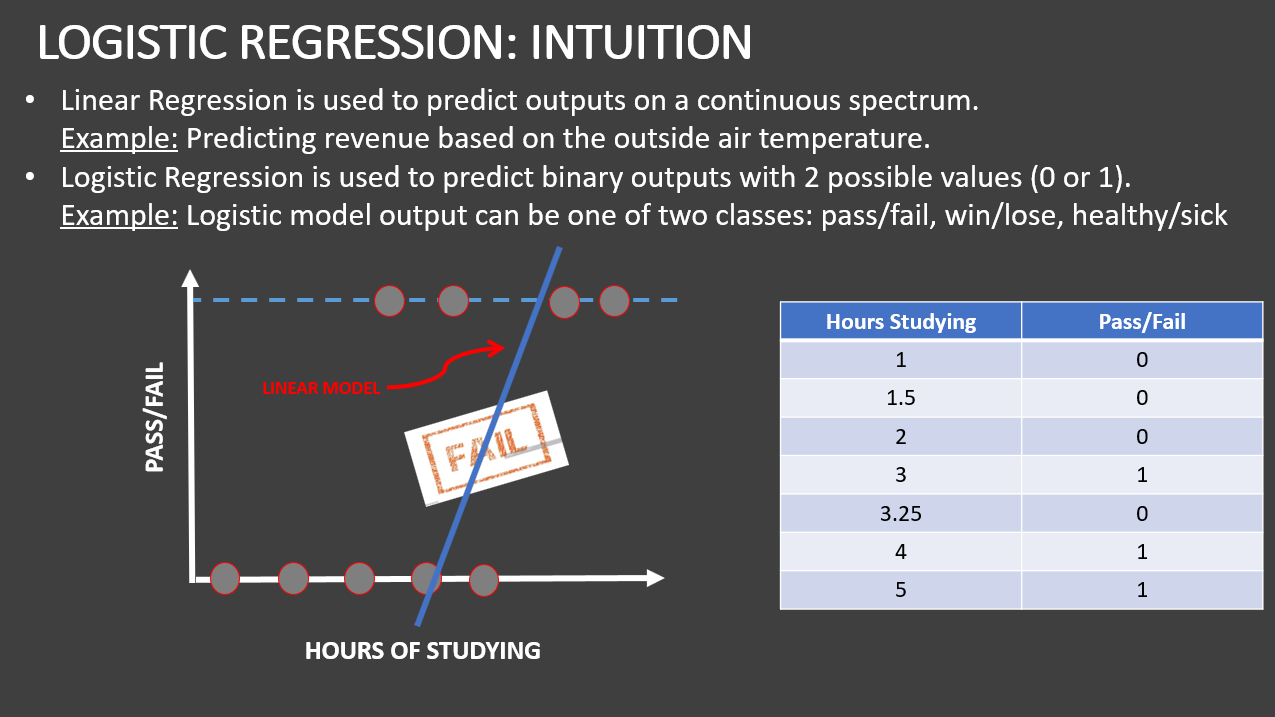

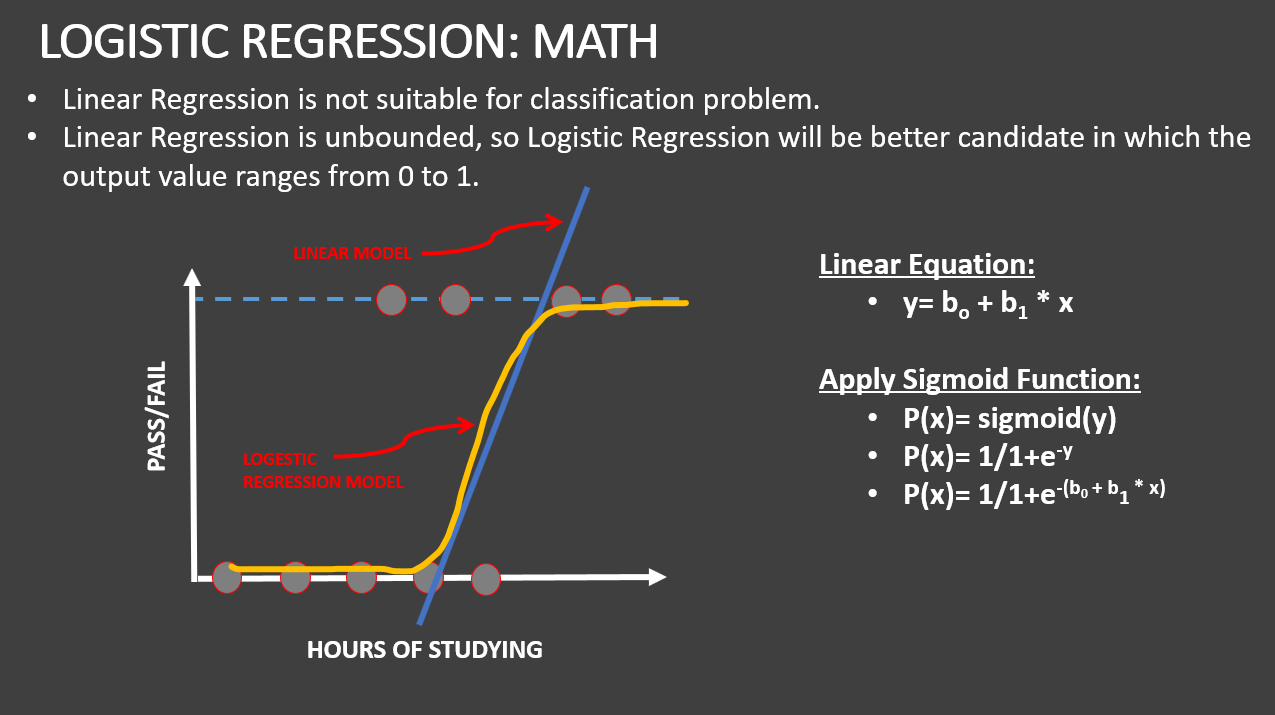

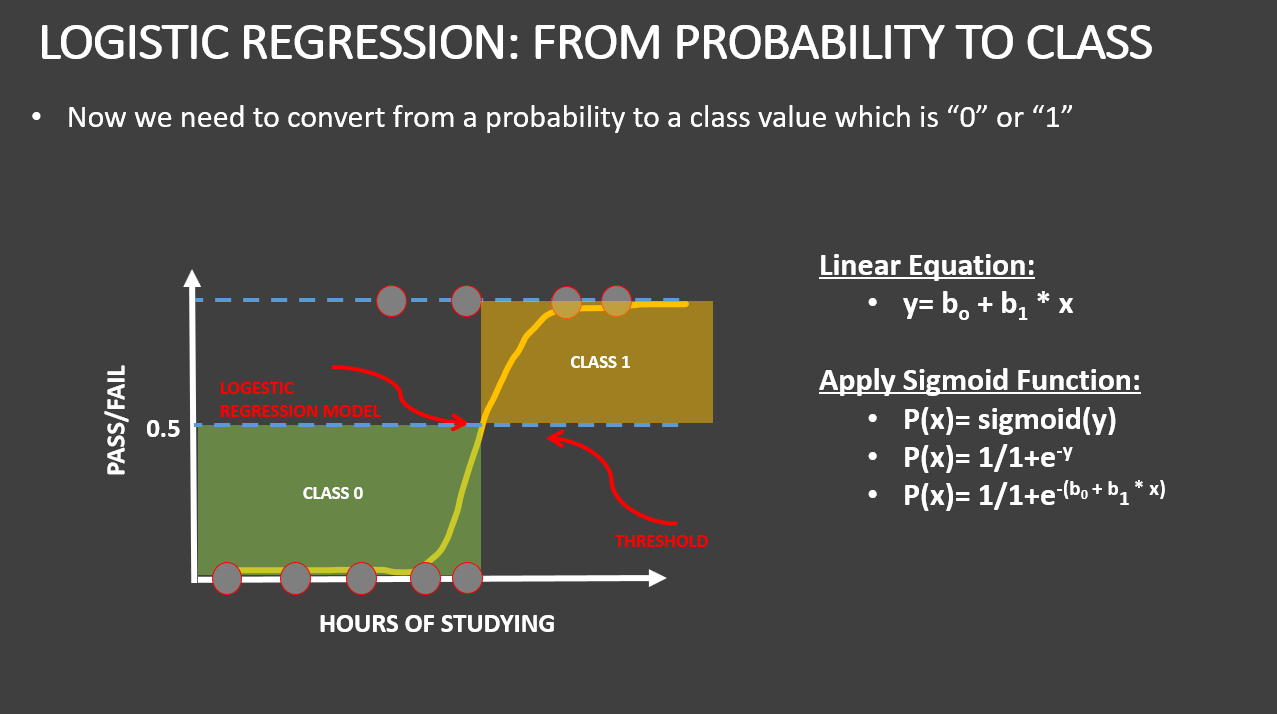

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [33]:
y_predict = model_LR.predict(X_test)

In [34]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.35      0.08      0.13       201

    accuracy                           0.86      1500
   macro avg       0.61      0.53      0.53      1500
weighted avg       0.80      0.86      0.82      1500



### This actually shows that this model is terrible!

### Confusion matrix to further show accuracy of model


<AxesSubplot:>

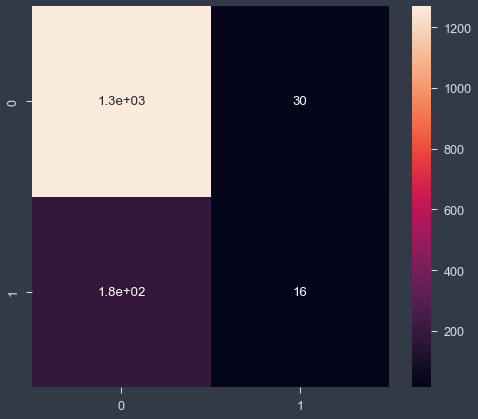

In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# 6: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

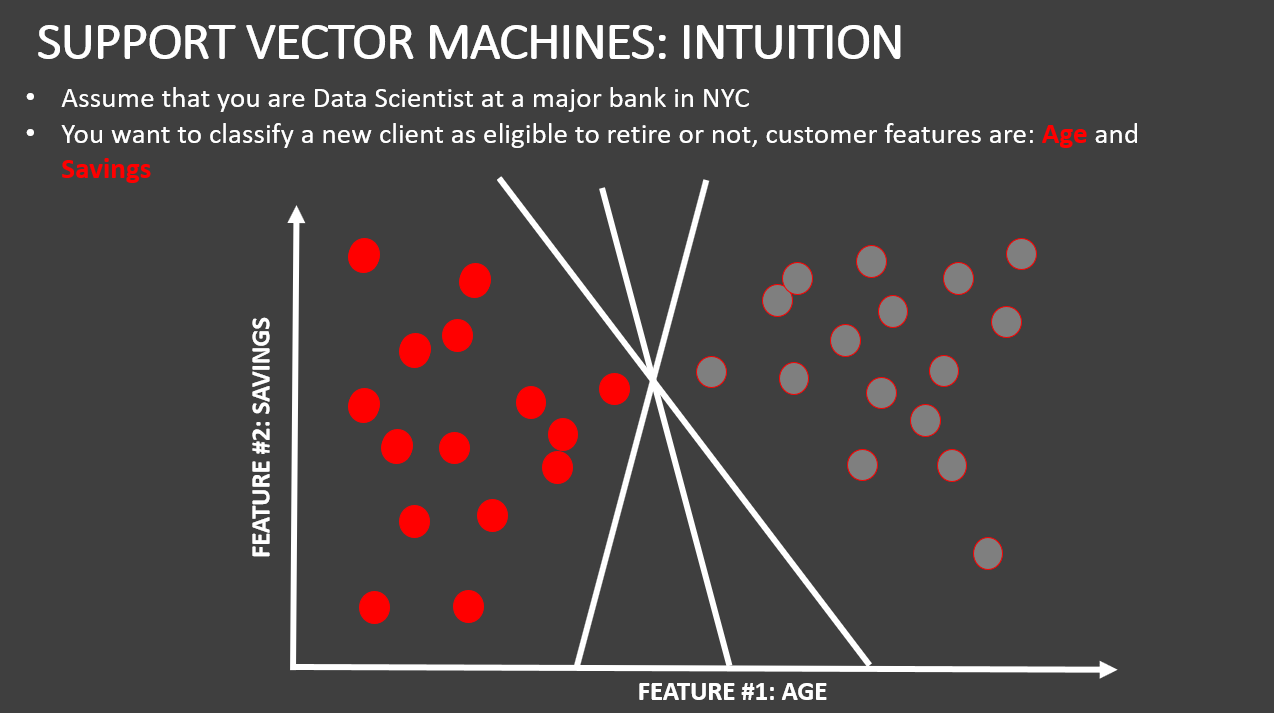

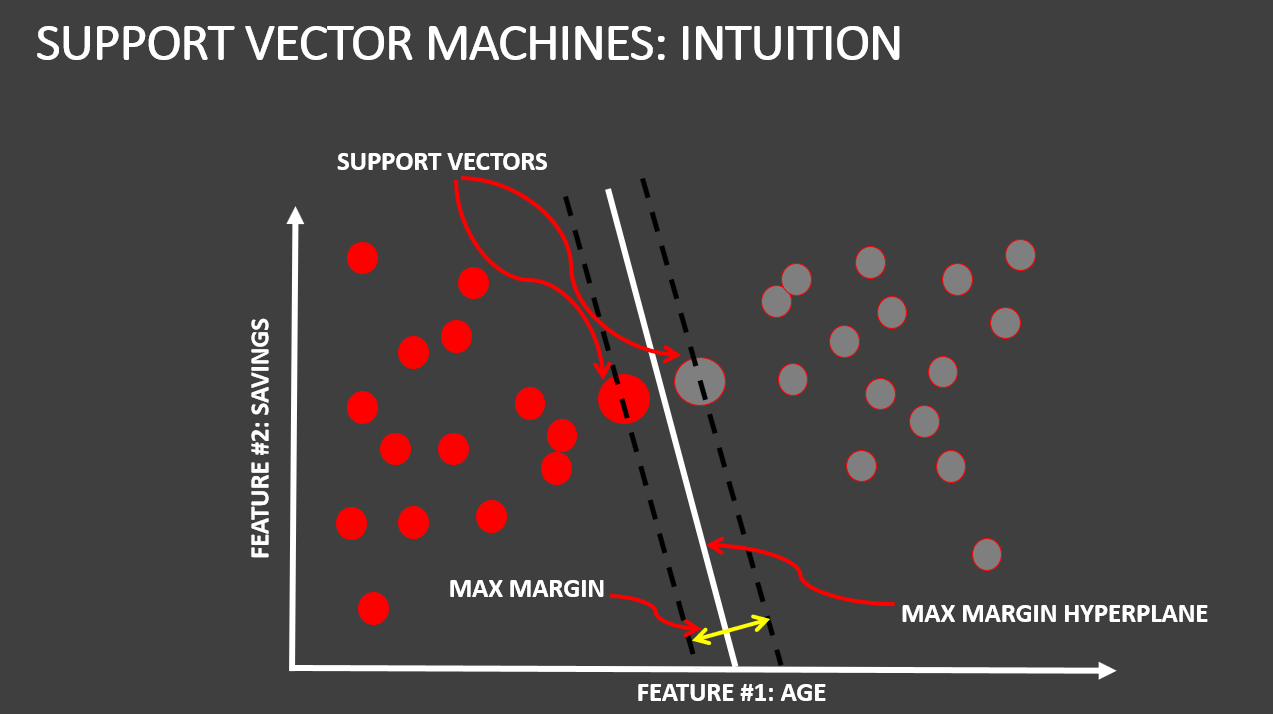

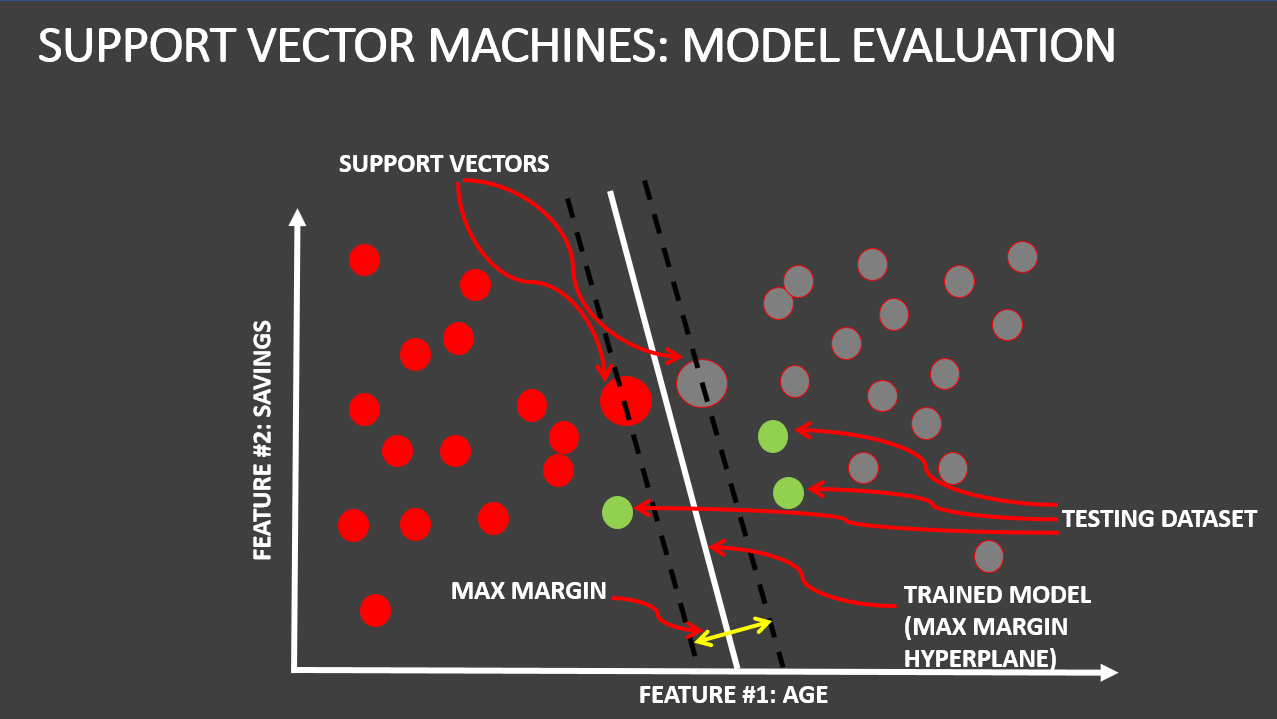

In [36]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)


C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\nadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [37]:
y_predict = model_svm.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1299
           1       0.43      0.14      0.21       201

    accuracy                           0.86      1500
   macro avg       0.66      0.56      0.57      1500
weighted avg       0.82      0.86      0.83      1500



<AxesSubplot:>

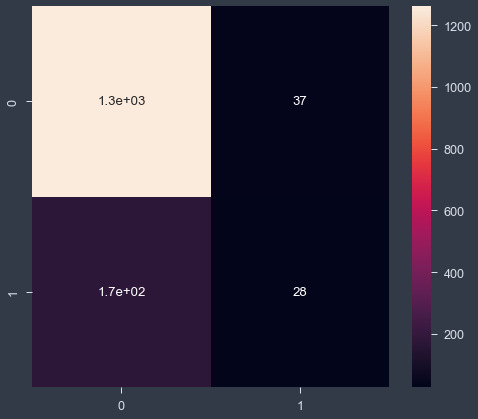

In [39]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### You can see that this Model has not performed well... we will go back and add the CalibratedClassifierCV (sklearn) 

### After adding it, the recall has increased a little bit... but still poor

# 7: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

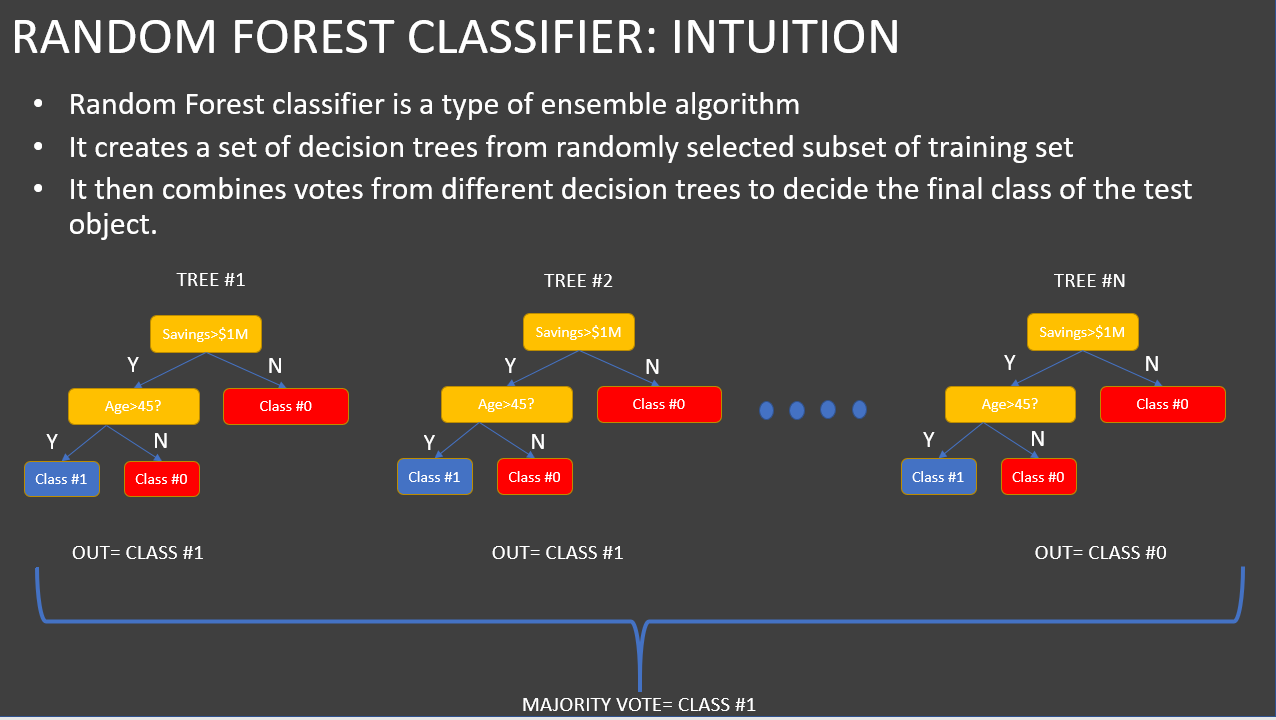

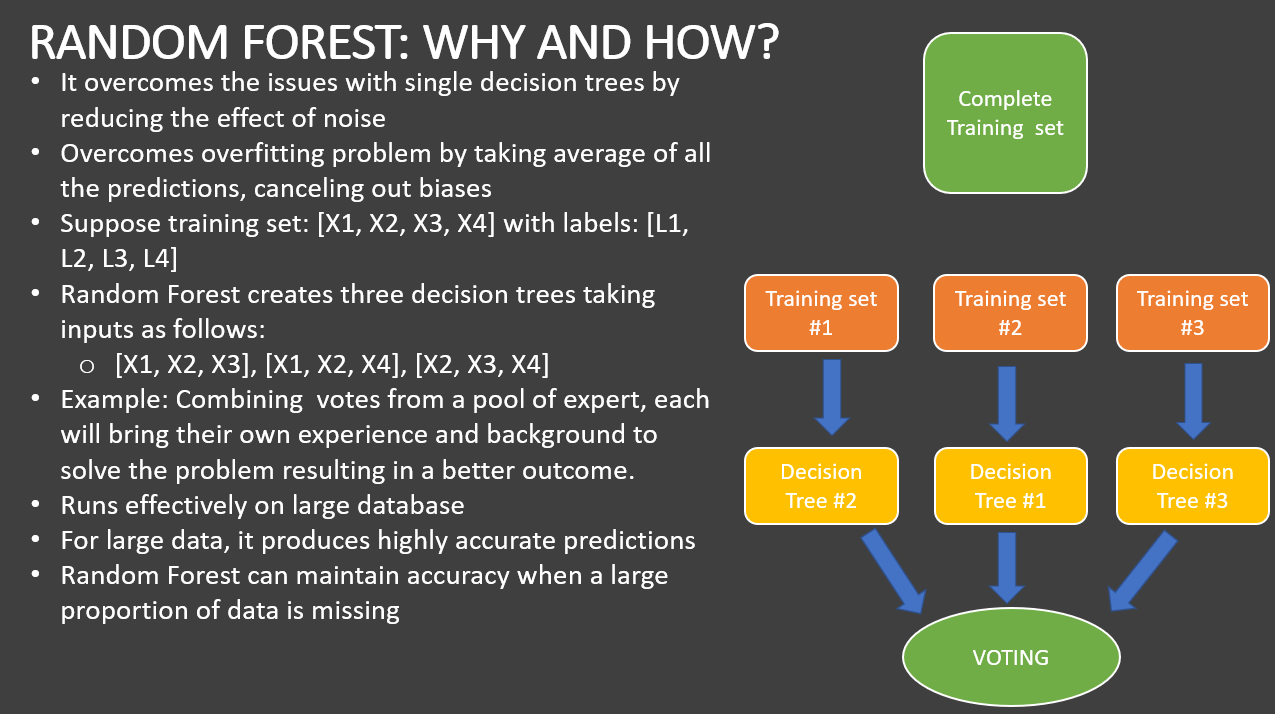

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_predict = model_rf.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1299
           1       0.91      0.79      0.85       201

    accuracy                           0.96      1500
   macro avg       0.94      0.89      0.91      1500
weighted avg       0.96      0.96      0.96      1500



### Much Higher Accuracy and Recall than the last two models!

<AxesSubplot:>

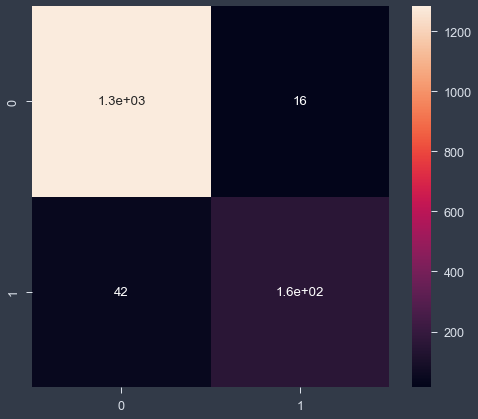

In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## MUCH BETTER! about 1300 samples correctly classified as "0", about 1700 samples correctly classified as "1"

# 8: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

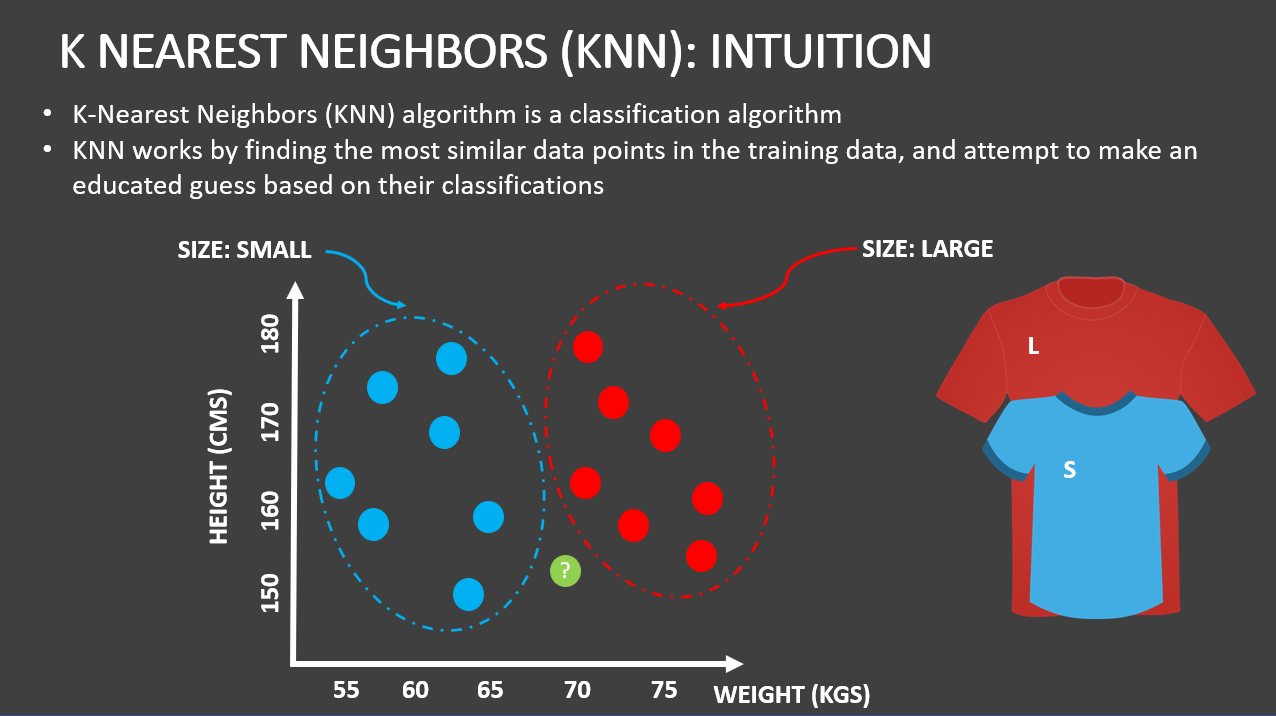

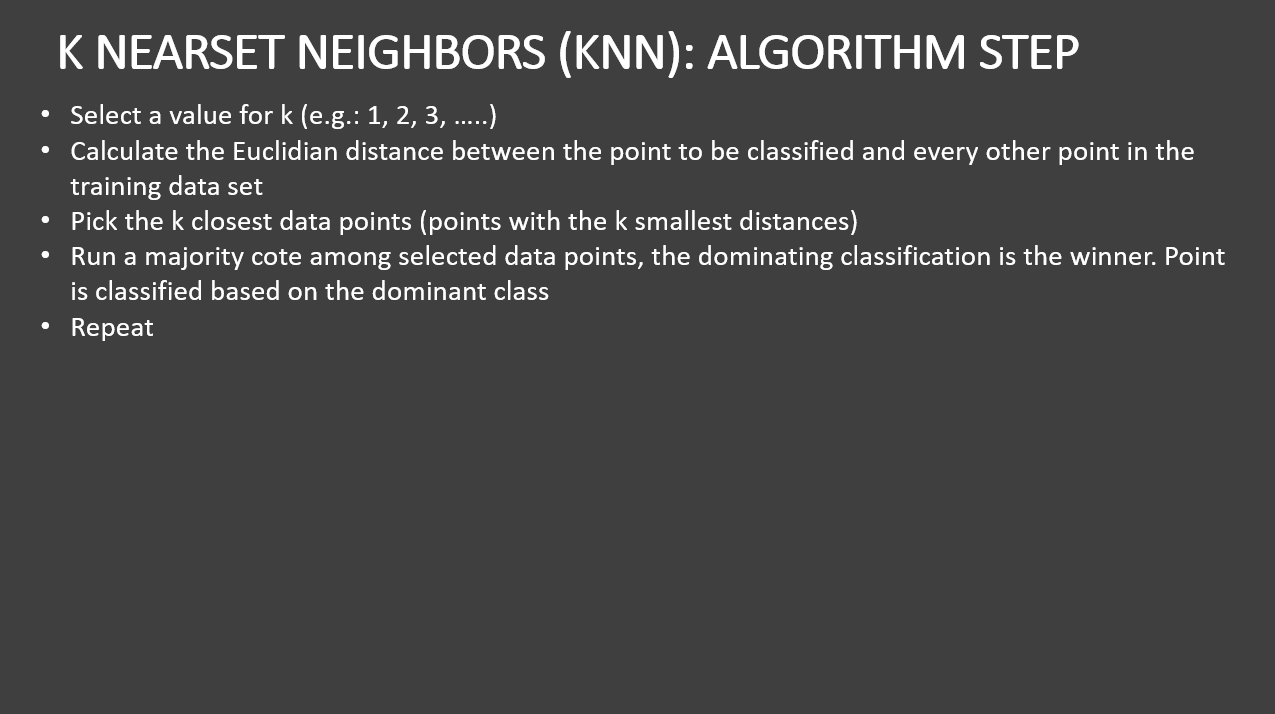

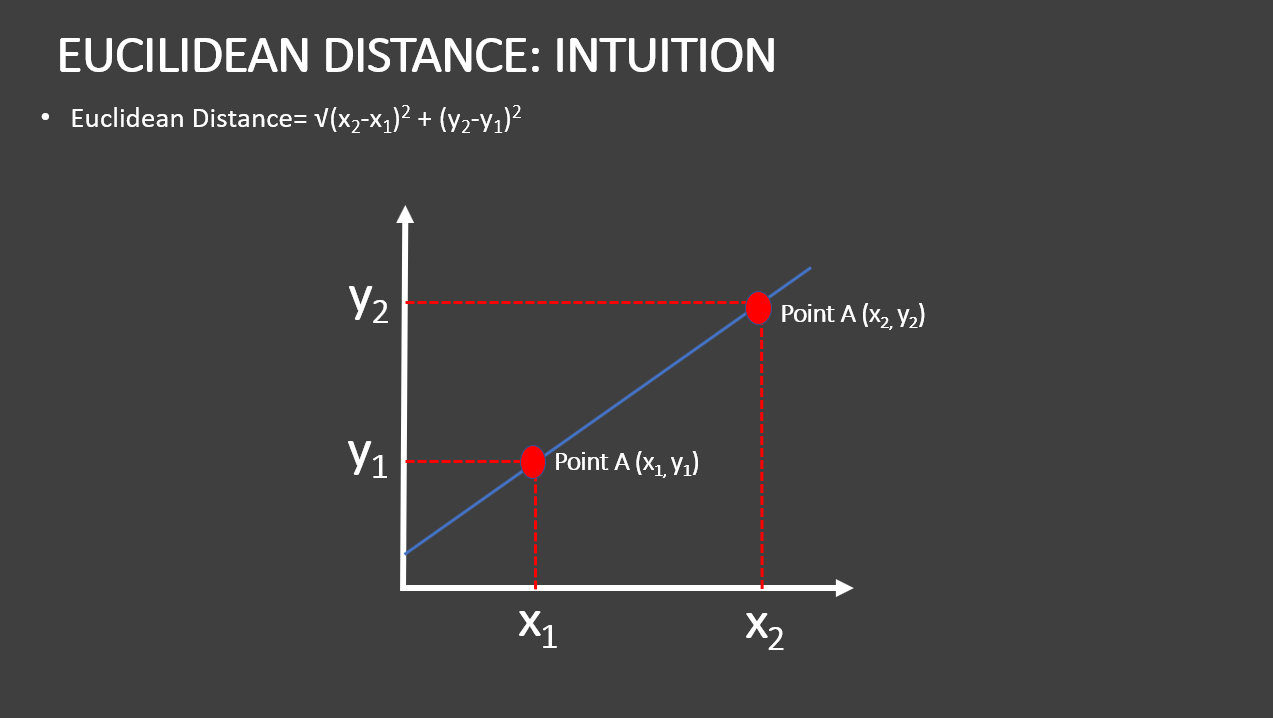

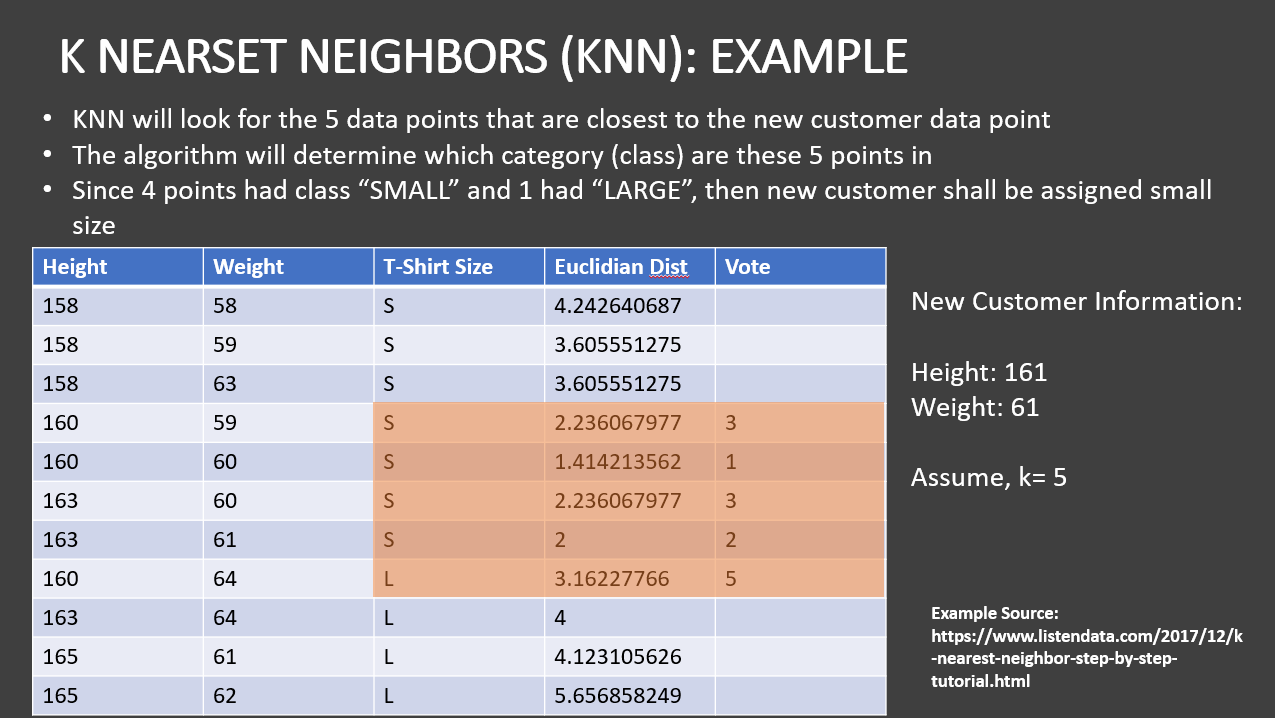

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [45]:
y_predict = model_knn.predict(X_test)

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1299
           1       0.70      0.30      0.42       201

    accuracy                           0.89      1500
   macro avg       0.80      0.64      0.68      1500
weighted avg       0.87      0.89      0.87      1500



### Here we see the results, quite better than the other models, but not as good as the Random Forest Classifier Model

<AxesSubplot:>

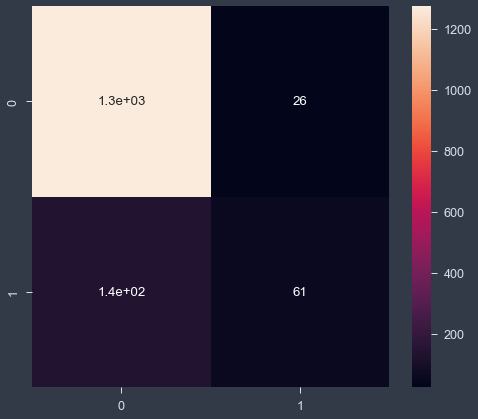

In [47]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

### a lot of misclassified samples as shown here

# 9: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

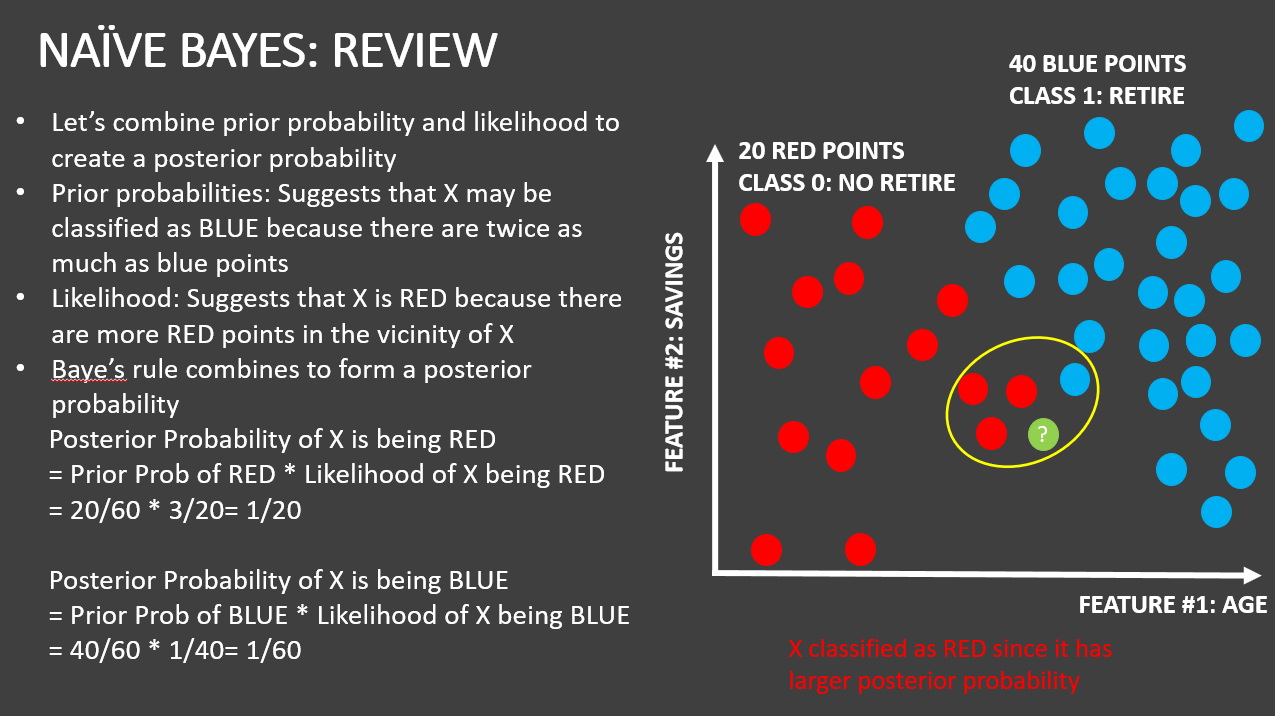

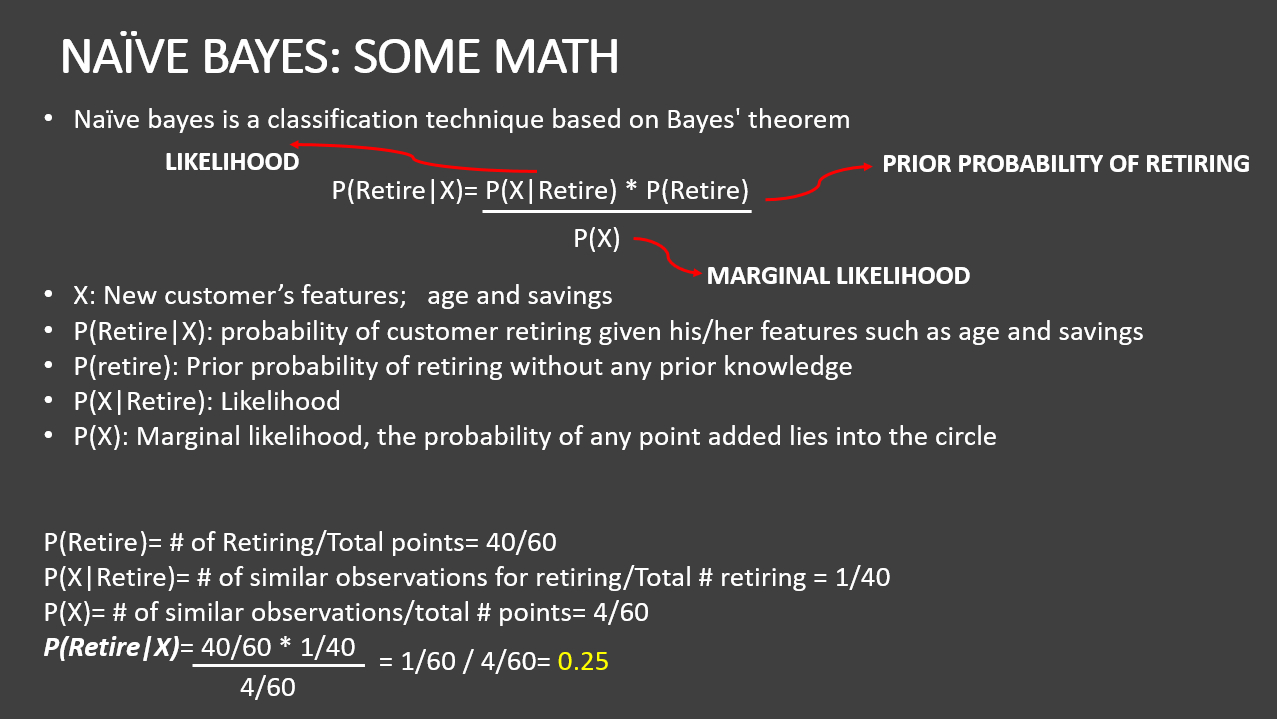

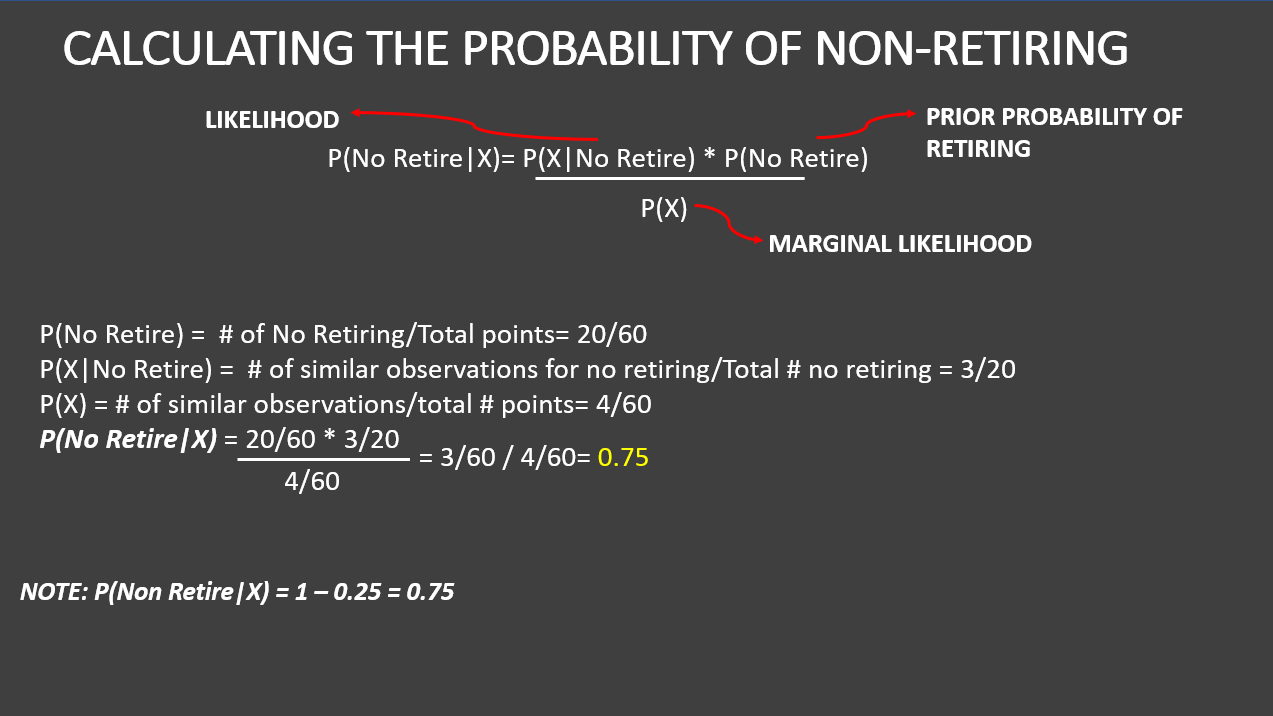

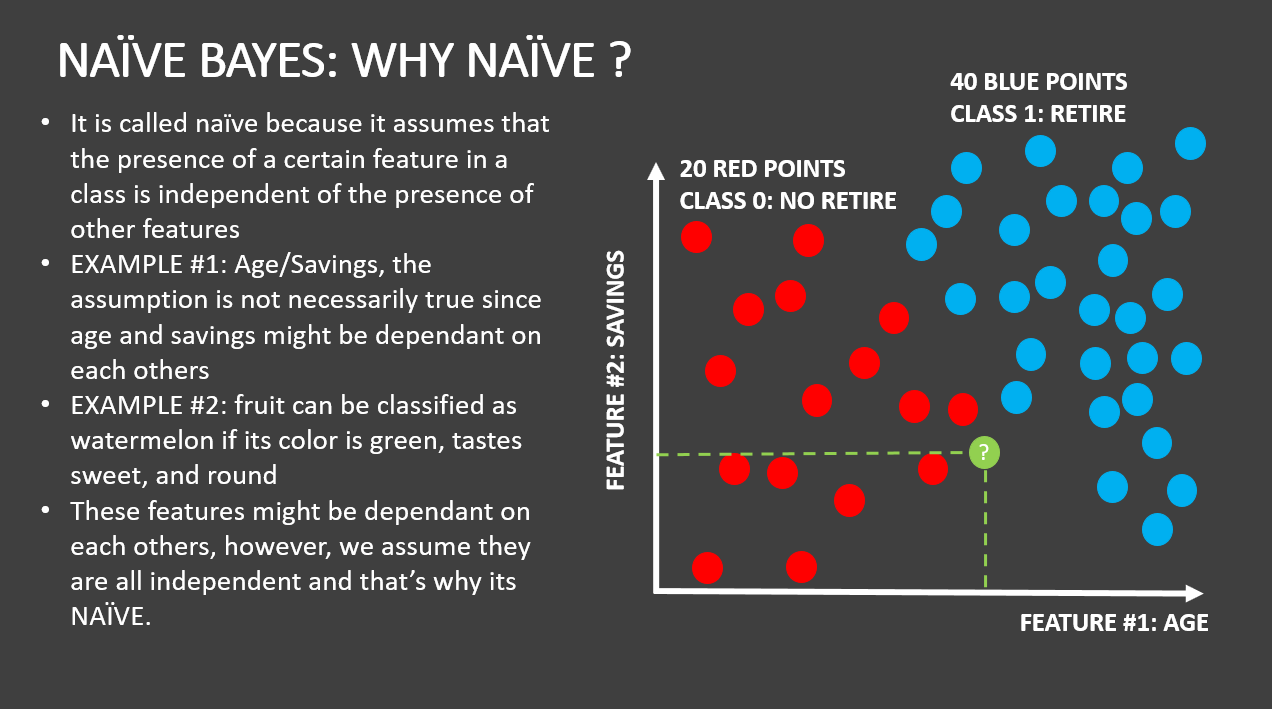

In [48]:
from sklearn.naive_bayes import GaussianNB


In [49]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
y_predict = model_gnb.predict(X_test)

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1299
           1       0.45      0.55      0.50       201

    accuracy                           0.85      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.86      0.85      0.86      1500



<AxesSubplot:>

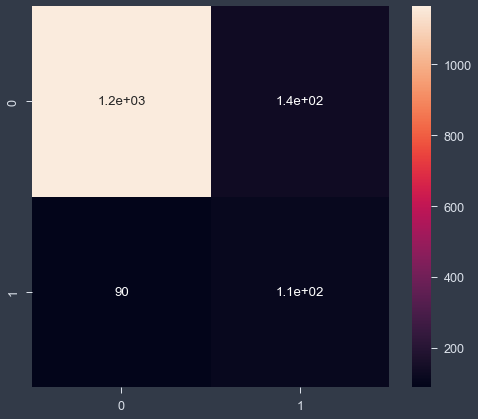

In [52]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# 10: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

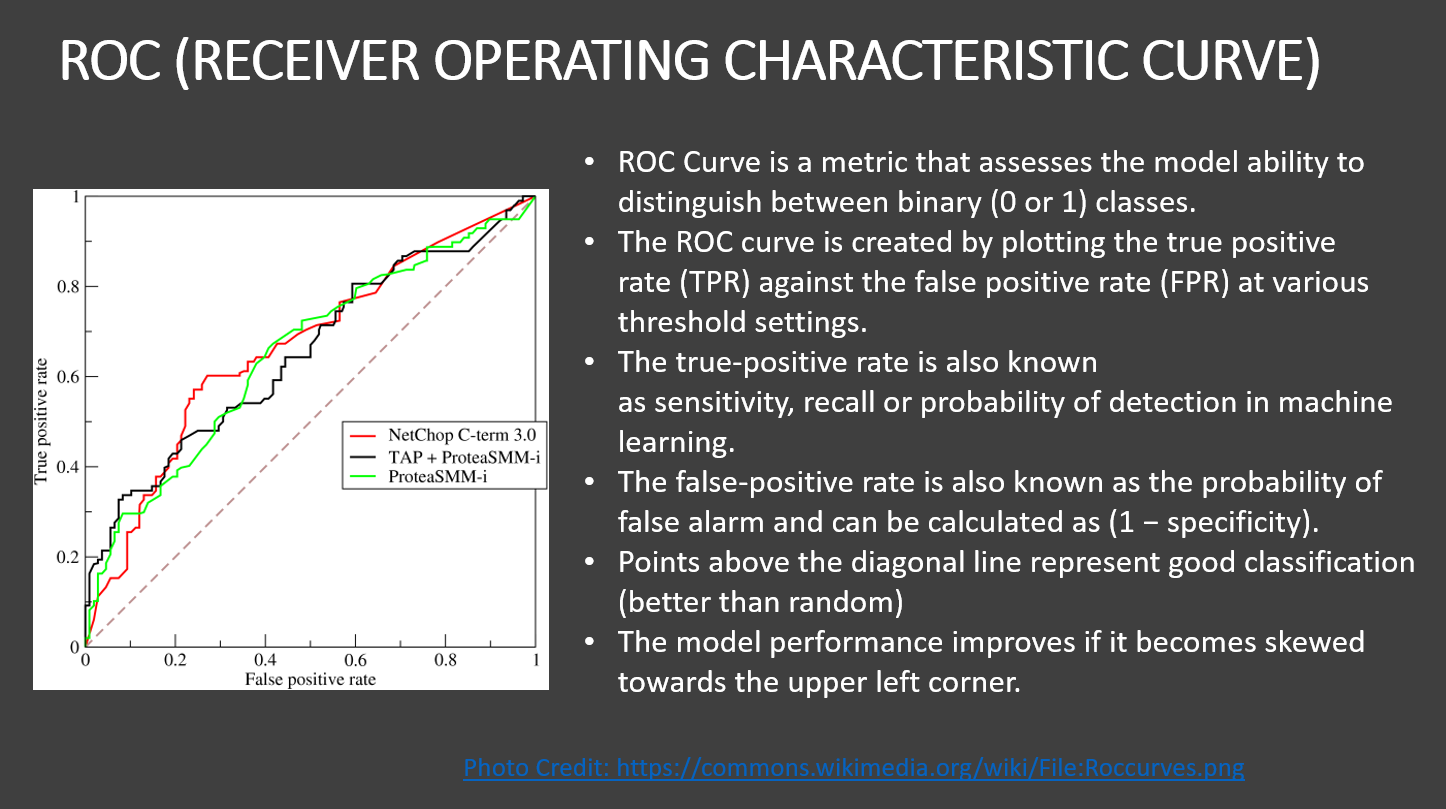

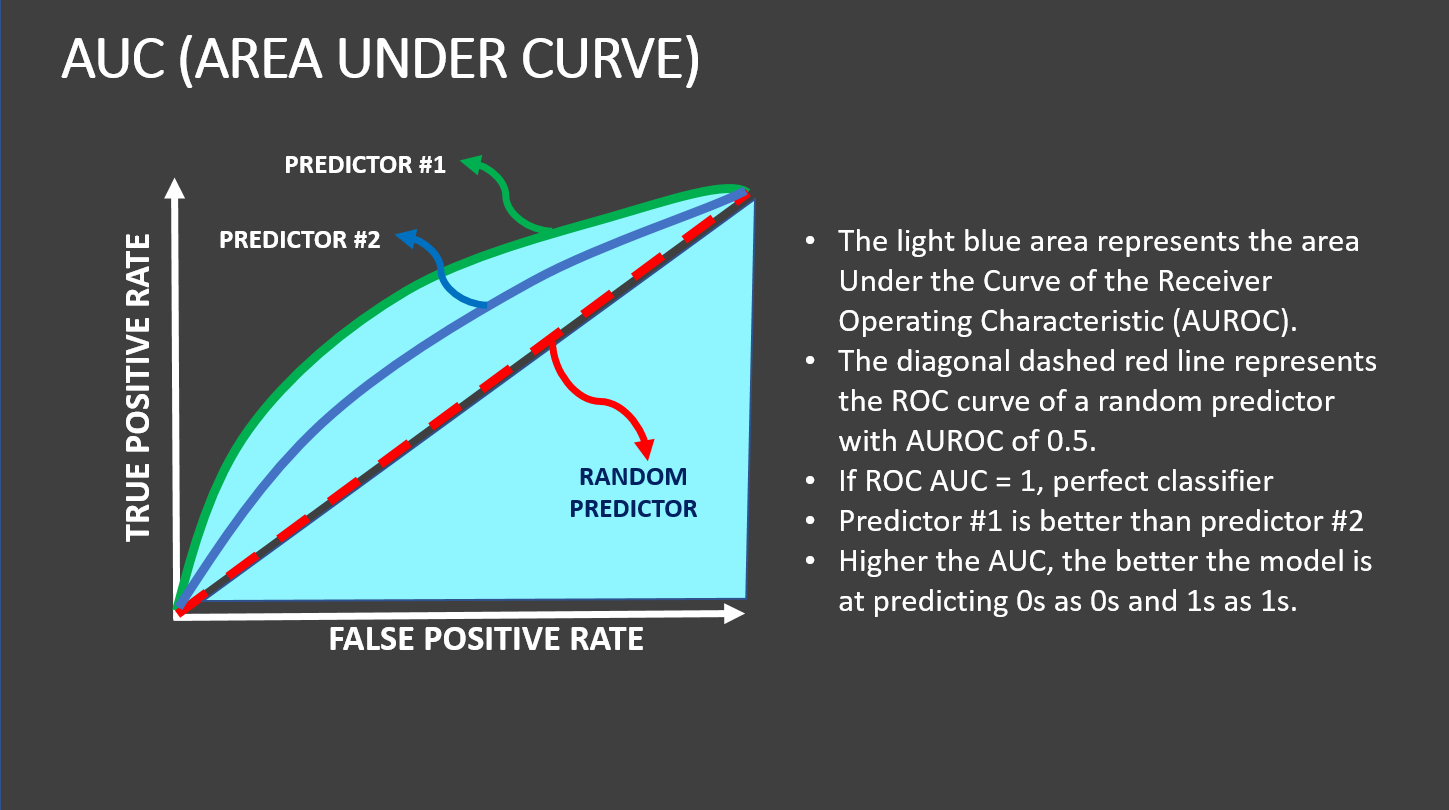

In [53]:
model_LR.predict_proba(X_test)

array([[0.80560575, 0.19439425],
       [0.96645678, 0.03354322],
       [0.71679095, 0.28320905],
       ...,
       [0.95540546, 0.04459454],
       [0.78727193, 0.21272807],
       [0.89825007, 0.10174993]])

In [54]:
model_LR.predict_proba(X_test)[:, 1] #takes only the second column of above, the prob that the item will be classified as "1"

array([0.19439425, 0.03354322, 0.28320905, ..., 0.04459454, 0.21272807,
       0.10174993])

In [55]:
y_test

3861    0
1186    0
330     0
3566    0
626     1
       ..
3755    0
799     0
34      0
505     0
2820    0
Name: class, Length: 1500, dtype: int64

In [56]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [57]:
fpr1 #False Positive Rate

array([0.00000000e+00, 0.00000000e+00, 7.69822941e-04, 7.69822941e-04,
       3.84911470e-03, 3.84911470e-03, 6.15858353e-03, 6.15858353e-03,
       7.69822941e-03, 7.69822941e-03, 8.46805235e-03, 8.46805235e-03,
       1.38568129e-02, 1.38568129e-02, 1.46266359e-02, 1.46266359e-02,
       1.77059276e-02, 1.77059276e-02, 2.00153965e-02, 2.00153965e-02,
       2.15550423e-02, 2.15550423e-02, 2.30946882e-02, 2.30946882e-02,
       2.46343341e-02, 2.46343341e-02, 2.69438029e-02, 2.69438029e-02,
       3.31023865e-02, 3.31023865e-02, 3.46420323e-02, 3.46420323e-02,
       3.61816782e-02, 3.61816782e-02, 4.00307929e-02, 4.00307929e-02,
       4.08006159e-02, 4.08006159e-02, 4.23402617e-02, 4.23402617e-02,
       4.54195535e-02, 4.54195535e-02, 4.61893764e-02, 4.61893764e-02,
       4.92686682e-02, 4.92686682e-02, 5.08083141e-02, 5.08083141e-02,
       5.31177829e-02, 5.31177829e-02, 5.38876059e-02, 5.38876059e-02,
       5.46574288e-02, 5.46574288e-02, 6.08160123e-02, 6.08160123e-02,
      

In [58]:
tpr1 #True Positive Rate

array([0.        , 0.00497512, 0.00497512, 0.00995025, 0.00995025,
       0.01492537, 0.01492537, 0.0199005 , 0.0199005 , 0.02487562,
       0.02487562, 0.02985075, 0.02985075, 0.039801  , 0.039801  ,
       0.05472637, 0.05472637, 0.06467662, 0.06467662, 0.06965174,
       0.06965174, 0.07462687, 0.07462687, 0.08457711, 0.08457711,
       0.08955224, 0.08955224, 0.09452736, 0.09452736, 0.09950249,
       0.09950249, 0.10447761, 0.10447761, 0.10945274, 0.10945274,
       0.11442786, 0.11442786, 0.11940299, 0.11940299, 0.12437811,
       0.12437811, 0.12935323, 0.12935323, 0.13432836, 0.13432836,
       0.13930348, 0.13930348, 0.15920398, 0.15920398, 0.16915423,
       0.16915423, 0.1840796 , 0.1840796 , 0.18905473, 0.18905473,
       0.19402985, 0.19402985, 0.21393035, 0.21393035, 0.21890547,
       0.21890547, 0.2238806 , 0.2238806 , 0.23383085, 0.23383085,
       0.23880597, 0.23880597, 0.24378109, 0.24378109, 0.24875622,
       0.24875622, 0.25870647, 0.25870647, 0.26368159, 0.26368

In [59]:
thresh1 #Threshold

array([1.81218347, 0.81218347, 0.80721635, 0.78714619, 0.72833452,
       0.72541811, 0.68869651, 0.68441887, 0.68254173, 0.68216384,
       0.68081113, 0.66886317, 0.60035769, 0.57370738, 0.57359158,
       0.55734837, 0.55016148, 0.53647387, 0.5311686 , 0.52977397,
       0.52051612, 0.51981737, 0.50632573, 0.49879747, 0.49664398,
       0.49525518, 0.48808854, 0.48808493, 0.47190954, 0.46950858,
       0.46810251, 0.46808285, 0.46615876, 0.46325997, 0.45298162,
       0.44951302, 0.4490523 , 0.4449377 , 0.44188302, 0.44131209,
       0.42854774, 0.42674611, 0.42674338, 0.42425992, 0.41749416,
       0.41513926, 0.4126382 , 0.40839334, 0.40288087, 0.4009362 ,
       0.40088351, 0.39576614, 0.39475111, 0.39367216, 0.37801306,
       0.37668703, 0.37657683, 0.37221032, 0.37111919, 0.3706603 ,
       0.36578854, 0.36332101, 0.35755193, 0.3545881 , 0.34941334,
       0.34749271, 0.34383577, 0.34371594, 0.34272976, 0.34196639,
       0.33889291, 0.33690801, 0.33483668, 0.33336348, 0.32988

In [60]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [61]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7188575980758257
Support Vector Machine:  0.7737563146545946
Random Forest:  0.907355064554058
K-Nearest Neighbors:  0.6608049054190174
Naive Bayes:  0.8384252716402592


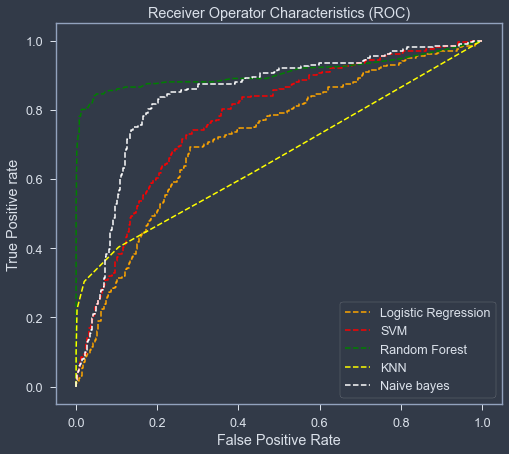

In [62]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

## Random Forest has the best ROC Curve (most skewed towards the top left corner of graph

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

# 11: CONCLUSION & PROJECT RECAP

In [63]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1299
           1       0.91      0.79      0.85       201

    accuracy                           0.96      1500
   macro avg       0.94      0.89      0.91      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

# THANK YOU!